# Project Computer Vision
### By: Bulloni Dyuman, Margni Nathan
### Supervisor: Giusti Alessandro

Source DB: https://landcover.ai.linuxpolska.com/

In [4]:
import skimage
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [5]:

im1 = skimage.io.imread('data/output/N-34-140-A-d-4-2_322.jpg')
m1 = skimage.io.imread('data/output/N-34-140-A-d-4-2_322_m.png')


In [12]:
np.unique(m1)

array([0, 2], dtype=uint8)

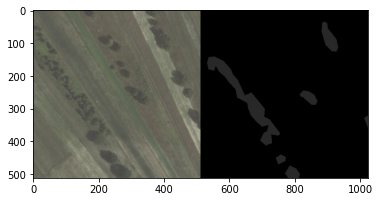

In [67]:
plt.imshow(np.hstack([im1, m1*20]))

In [41]:
woodland = (m1==2)
mask = woodland.sum(axis=2)
np.unique(mask)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
np.unique(m1[:,:,2])

array([0, 2], dtype=uint8)

In [65]:
wood = np.where(m1,im1, 2)
wood.shape

(512, 512, 3)

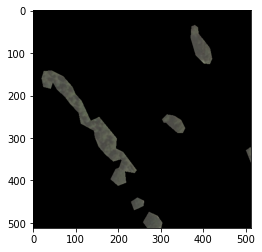

In [66]:
plt.imshow(wood)

In [14]:
import os
import glob
import pandas as pd

['data\\output\\M-33-20-D-c-4-2_0_m.png', 'data\\output\\M-33-20-D-c-4-2_100_m.png', 'data\\output\\M-33-20-D-c-4-2_101_m.png', 'data\\output\\M-33-20-D-c-4-2_102_m.png', 'data\\output\\M-33-20-D-c-4-2_103_m.png', 'data\\output\\M-33-20-D-c-4-2_104_m.png', 'data\\output\\M-33-20-D-c-4-2_105_m.png', 'data\\output\\M-33-20-D-c-4-2_106_m.png', 'data\\output\\M-33-20-D-c-4-2_108_m.png', 'data\\output\\M-33-20-D-c-4-2_109_m.png', 'data\\output\\M-33-20-D-c-4-2_10_m.png', 'data\\output\\M-33-20-D-c-4-2_110_m.png', 'data\\output\\M-33-20-D-c-4-2_111_m.png', 'data\\output\\M-33-20-D-c-4-2_112_m.png', 'data\\output\\M-33-20-D-c-4-2_113_m.png', 'data\\output\\M-33-20-D-c-4-2_114_m.png', 'data\\output\\M-33-20-D-c-4-2_115_m.png', 'data\\output\\M-33-20-D-c-4-2_116_m.png', 'data\\output\\M-33-20-D-c-4-2_117_m.png', 'data\\output\\M-33-20-D-c-4-2_118_m.png', 'data\\output\\M-33-20-D-c-4-2_119_m.png', 'data\\output\\M-33-20-D-c-4-2_11_m.png', 'data\\output\\M-33-20-D-c-4-2_120_m.png', 'data\\output\

In [136]:
class_dict: dict = {0: 'nc', 1: 'building', 2:'woodland', 3: 'water', 4: 'road'}
mask_files = glob.glob(f'data{os.sep}output{os.sep}*_m.png')

def get_proportions(mask_files):
    mask_list = []
    for idx,m_file in enumerate(mask_files):
        mask = skimage.io.imread(m_file)[:,:,0] # The 3 channels contains the same information
        mask_dict = {}
        mask_dict['name'] = m_file.split(os.sep)[-1].split('.')[0]
        for key in class_dict.keys():
            mask_dict[class_dict[key]] = np.sum(mask==key)
        # print(mask_dict)
        mask_list.append(mask_dict)
    df_mask = pd.DataFrame().from_dict(mask_list)
    return df_mask
df_mask = get_proportions(mask_files)
df_mask.head()

In [21]:
df_mask.to_csv('data/pixel_map.csv')


In [73]:
n_pixels = 512*512
def show_proportions(df_mask):
    outlier_mask = df_mask.sum(axis=1) != n_pixels
    print(f'There are {np.sum(outlier_mask)} outliers with a strange total of pixels found. ')
    print('This is the total distribution of our classes:\n')
    df_freq_class = pd.DataFrame(df_mask[class_dict.values()].sum(axis=0))
    tot_pixels = df_freq_class.sum()[0]
    df_freq_class['class_frequency'] = df_freq_class[0] / tot_pixels
    df_freq_class.reset_index(inplace=True)
    df_freq_class.rename(columns={'index': 'class_name', 0: 'pixel_count'}, inplace=True)
    print(df_freq_class)
    return df_freq_class
show_proportions(df_mask)

There are 0 outliers with a strange total of pixels found. 
This is the total distribution of our classes:

  class_name  pixel_count  class_frequency
0         nc   1626435631         0.581259
1   building     24566909         0.008780
2   woodland    925644528         0.330809
3      water    175769115         0.062817
4       road     45708873         0.016336


C:\Users\dyuma\AppData\Local\Temp/ipykernel_20660/1646468557.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outlier_mask = df_mask.sum(axis=1) != n_pixels


,class_name,pixel_count,class_frequency
0,nc,1626435631,0.581259
1,building,24566909,0.008780
2,woodland,925644528,0.330809
3,water,175769115,0.062817
4,road,45708873,0.016336


In [57]:
with open('data/train.txt', 'r') as train_file:
    train_files = train_file.read().splitlines()
with open('data/val.txt', 'r') as val_file:
    val_files = val_file.read().splitlines()
with open('data/test.txt', 'r') as test_file:
    test_files = test_file.read().splitlines()
print(f'The data are divided in the following way: \n{len(train_files)} images for training, '
      f'\n{len(val_files)} for validation and \n{len(test_files)} for testing. ')

The data are divided in the following way: 
7470 images for training, 
1602 for validation and 
1602 for testing. 


In [82]:
path_dir = 'data/output/'

def get_image_paths(files):
    return [path_dir + filename + '.jpg' for filename in files]
def get_mask_path(files):
        return [path_dir + filename + "_m.png" for filename in files]


train_masks = get_mask_path(train_files)

train_masks

['data/output/M-33-20-D-c-4-2_0_m.png',
 'data/output/M-33-20-D-c-4-2_1_m.png',
 'data/output/M-33-20-D-c-4-2_10_m.png',
 'data/output/M-33-20-D-c-4-2_100_m.png',
 'data/output/M-33-20-D-c-4-2_102_m.png',
 'data/output/M-33-20-D-c-4-2_104_m.png',
 'data/output/M-33-20-D-c-4-2_106_m.png',
 'data/output/M-33-20-D-c-4-2_108_m.png',
 'data/output/M-33-20-D-c-4-2_109_m.png',
 'data/output/M-33-20-D-c-4-2_11_m.png',
 'data/output/M-33-20-D-c-4-2_111_m.png',
 'data/output/M-33-20-D-c-4-2_112_m.png',
 'data/output/M-33-20-D-c-4-2_114_m.png',
 'data/output/M-33-20-D-c-4-2_115_m.png',
 'data/output/M-33-20-D-c-4-2_118_m.png',
 'data/output/M-33-20-D-c-4-2_119_m.png',
 'data/output/M-33-20-D-c-4-2_12_m.png',
 'data/output/M-33-20-D-c-4-2_121_m.png',
 'data/output/M-33-20-D-c-4-2_122_m.png',
 'data/output/M-33-20-D-c-4-2_123_m.png',
 'data/output/M-33-20-D-c-4-2_13_m.png',
 'data/output/M-33-20-D-c-4-2_130_m.png',
 'data/output/M-33-20-D-c-4-2_131_m.png',
 'data/output/M-33-20-D-c-4-2_132_m.png',


In [68]:
train_prop = get_proportions(train_masks)


In [83]:
train_freq = show_proportions(train_prop)
train_pixels_1 = train_freq[train_freq['class_name'] == 'woodland'].loc[2,'pixel_count']
train_pixels_0 = sum(train_freq['pixel_count']) - train_pixels_1
print(f'There is a total of {train_pixels_0} pixels of class 0 (NOT WOODLAND) and {train_pixels_1} of class 1 (WOODLAND)')

There are 0 outliers with a strange total of pixels found. 
This is the total distribution of our classes:

  class_name  pixel_count  class_frequency
0         nc   2268879856         0.579323
1   building     33534476         0.008563
2   woodland   1297429664         0.331279
3      water    253016610         0.064604
4       road     63570754         0.016232
There is a total of 2619001696 pixels of class 0 (NOT WOODLAND) and 1297429664 of class 1 (WOODLAND)


C:\Users\dyuma\AppData\Local\Temp/ipykernel_20660/1646468557.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outlier_mask = df_mask.sum(axis=1) != n_pixels


In [164]:
train_images = get_image_paths(train_files)
tr_sample_n_pixels = 14_000
tr_class_0_p = tr_sample_n_pixels / train_pixels_0
tr_class_1_p = tr_sample_n_pixels / train_pixels_1

In [163]:
np.random.seed(42)
def get_random_pixel_sampling(images, masks, target, class_0_p, class_1_p):
    assert len(images) == len(masks)
    pixel_positive = []
    pixel_negative = []
    for idx in range(len(images)):
        mask = skimage.io.imread(masks[idx])
        im = skimage.io.imread(images[idx])

        c1_mask = mask[:,:,0] == target
        c0_im = im[~c1_mask]
        c1_im = im[c1_mask]
        c0_choice = np.random.uniform(0,1, c0_im.shape[0])
        c1_choice = np.random.uniform(0,1, c1_im.shape[0])
        pixel_negative.extend(c0_im[c0_choice <= class_0_p])
        pixel_positive.extend(c1_im[c1_choice <= class_1_p])

    negative_data = np.insert(np.asarray(pixel_negative), 3, 0, axis=1)
    positive_data = np.insert(np.asarray(pixel_positive), 3, 1, axis=1)

    data = np.vstack([negative_data, positive_data])
    df = pd.DataFrame(columns=['r','g','b','wood'], data=data)
    return df

In [165]:
df_train = get_random_pixel_sampling(train_images, train_masks, 2, tr_class_0_p, tr_class_1_p)
df_train.head()
df_train.to_csv('data/train_sample.csv')

In [156]:
test_masks = get_mask_path(test_files)
test_images = get_image_paths(test_files)
test_prop = get_proportions(test_masks)

In [157]:
test_freq = show_proportions(test_prop)
test_pixels_1 = test_freq[test_freq['class_name'] == 'woodland'].loc[2,'pixel_count']
test_pixels_0 = sum(test_freq['pixel_count']) - test_pixels_1
print(f'There is a total of {test_pixels_0} pixels of class 0 (NOT WOODLAND) and {test_pixels_1} of class 1 (WOODLAND)')

There are 0 outliers with a strange total of pixels found. 
This is the total distribution of our classes:

  class_name  pixel_count  class_frequency
0         nc    239926712         0.571316
1   building      3956554         0.009421
2   woodland    144170112         0.343299
3      water     24388122         0.058073
4       road      7513188         0.017890
There is a total of 275784576 pixels of class 0 (NOT WOODLAND) and 144170112 of class 1 (WOODLAND)


C:\Users\dyuma\AppData\Local\Temp/ipykernel_20660/1646468557.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  outlier_mask = df_mask.sum(axis=1) != n_pixels


In [160]:
sum(test_freq['pixel_count']) == 512*512*len(test_masks)

True

In [166]:
te_sample_n_pixels = 3_000
te_class_0_p = te_sample_n_pixels / test_pixels_0
te_class_1_p = te_sample_n_pixels / test_pixels_1

In [167]:
df_test = get_random_pixel_sampling(test_images, test_masks, 2, te_class_0_p, te_class_1_p)
df_test.to_csv('data/test_sample.csv')
df_test.shape

(5942, 4)

In [153]:
df_test.head()

,r,g,b,wood
0,63,65,62,0
1,77,77,75,0
2,66,66,64,0
3,134,141,90,0
4,100,102,88,0


In [151]:
print(tr_class_1_p, te_class_1_p)

1.0790565676475854e-05 4.1617502523685355e-05


In [ ]:
large_img_name = 'N-34-140-A-d-3-4'

It is important to remove all the images that start with the large_img_name from train.txt and val.txt, which are the mapping of the files for the sets. 
The updated files are stored into the 'files_data' folder. 